In [1]:
from danq import get_danq_model
import numpy as np

#X_train = np.load('/home/eramamur/jemmie_3exphg_danq_input_data/X_train.npy')
#Y_train = np.load('/home/eramamur/jemmie_3exphg_danq_input_data/Y_train.npy')

X_valid = np.load('/home/eramamur/jemmie_3exphg_danq_input_data/X_valid.npy')
Y_valid = np.load('/home/eramamur/jemmie_3exphg_danq_input_data/Y_valid.npy')

#X_train = X_train[0:20][:][:]
#Y_train = Y_train[0:20][:]

#X_valid = X_train[0:20][:][:]
#Y_valid = Y_valid[0:20][:][:]

Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: GeForce GTX 1080 (CNMeM is enabled with initial size: 95.0% of memory, cuDNN 5105)


In [3]:
numLabels = Y_valid.shape[1]
model = get_danq_model(numLabels=numLabels)
model.load_weights('/home/eramamur/Github_repos/ml-prototypes/3exphg_danq_like/saved_models/danq_3exphg_lr_0.0001.hdf5')

In [4]:
#pred_train = model.predict_proba(X_train)
pred_valid = model.predict_proba(X_valid)

65376/65406 [============================>.] - ETA: 0s

In [23]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score

#for i in xrange(numLabels):
    #print "Training ROC AUC:", roc_auc_score(Y_train[:,i], pred_train[:,i])
    #avg_train_precision = average_precision_score(Y_train[:,i], pred_train[:,i])
    #print "Training PR AUC:", avg_train_precision
    #print "Training accuracy:", 1.0*np.sum(Y_train[:,i]==(pred_train[:,1]>=0.5))/len(Y_train[:,i])

#print

fpr = dict()
tpr = dict()
roc_auc = dict()
avg_precision = dict()
precision = dict()
recall = dict()
for i in xrange(numLabels):
    fpr[i], tpr[i], _ = roc_curve(Y_valid[:, i], pred_valid[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    avg_precision[i] = average_precision_score(Y_valid[:,i], pred_valid[:,i])
    precision[i], recall[i], _ = precision_recall_curve(Y_valid[:,i], pred_valid[:,i])

for i in xrange(numLabels):
    print "Validation ROC AUC:", roc_auc[i]
    print "Validation PR AUC:", avg_precision[i]
    print "Validation accuracy:", 1.0*np.sum(Y_valid[:,i]==(pred_valid[:,1]>=0.5))/len(Y_valid[:,i])

Validation ROC AUC: 0.658991177708
Validation PR AUC: 0.731020874478
Validation accuracy: 0.543772742562
Validation ROC AUC: 0.637093540516
Validation PR AUC: 0.662117471317
Validation accuracy: 0.593875179647
Validation ROC AUC: 0.707283348069
Validation PR AUC: 0.712159960855
Validation accuracy: 0.504571446045


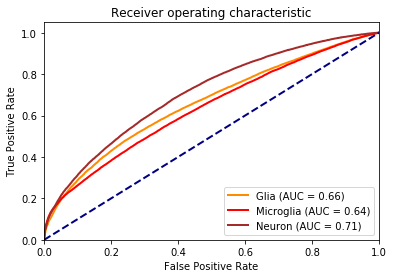

In [10]:
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='Glia (AUC = %0.2f)' % roc_auc[0])
plt.plot(fpr[1], tpr[1], color='red',
         lw=lw, label='Microglia (AUC = %0.2f)' % roc_auc[1])
plt.plot(fpr[2], tpr[2], color='brown',
         lw=lw, label='Neuron (AUC = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [19]:
import plotly.plotly as py
import plotly.graph_objs as go
import random

referenceLine = [0]+[random.random() for i in xrange(100)]+[1]

trace0 = go.Scatter(
    x = fpr[0],
    y = tpr[0],
    mode = 'lines',
    name = 'Glia'
)
trace1 = go.Scatter(
    x = fpr[1],
    y = tpr[1],
    mode = 'lines',
    name = 'Microglia'
)
trace2 = go.Scatter(
    x = fpr[2],
    y = tpr[2],
    mode = 'lines',
    name = 'Neuron'
)

trace3 = go.Scatter(
    x = referenceLine,
    y = referenceLine,
    mode = 'lines',
    line = dict(dash = 'dash')
)

data = [trace0, trace1, trace2, trace3]

py.iplot(data, filename='aucs')

The draw time for this plot will be slow for all clients.


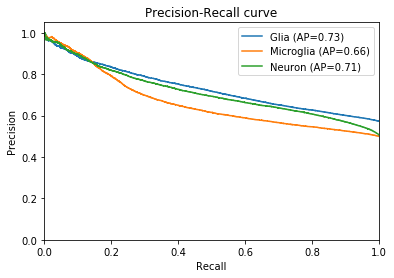

In [28]:
labels = ["Glia", "Microglia", "Neuron"]
plt.figure()
for i in xrange(numLabels):
    plt.step(recall[i], precision[i], where='post', label=labels[i]+" (AP={0:0.2f})".format(avg_precision[i]))
    #plt.fill_between(recall[i], precision[i], step='post', alpha=0.2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve')
plt.legend()
plt.show()

In [29]:
trace0 = go.Scatter(
    x = recall[0],
    y = precision[0],
    mode = 'lines',
    name = 'Glia'
)
trace1 = go.Scatter(
    x = recall[1],
    y = precision[1],
    mode = 'lines',
    name = 'Microglia'
)
trace2 = go.Scatter(
    x = recall[2],
    y = precision[2],
    mode = 'lines',
    name = 'Neuron'
)

data = [trace0, trace1, trace2]

py.iplot(data, filename='auprs')

/home/eramamur/bin/miniconda2/lib/python2.7/site-packages/plotly/plotly/plotly.py:218: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.



The draw time for this plot will be slow for all clients.


In [ ]:
for i in xrange(numLabels):
    print sum(Y_train[:,i]==1)
    print sum(Y_train[:,i]==0)
    print sum(Y_valid[:,i]==1)
    print sum(Y_valid[:,i]==0)